# GoogleStock Prediction Using RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

training_set=pd.read_csv('GoogleStockPrice_Train.csv')
training_set=training_set.iloc[:,1:2].values

In [2]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

X_train= training_set[0:1257]
y_train= training_set[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.1568
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1087
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0855
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0755
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0715
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0696
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0680
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0665
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0633
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0600
Epoch 13/200
40/40 [=================

In [5]:
test_set = pd.read_csv('GoogleStockPrice_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

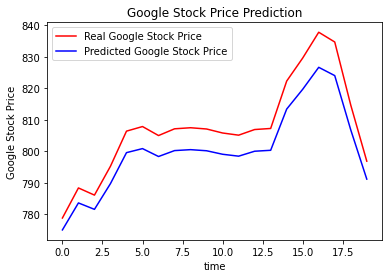

In [6]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()